In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('Dataset.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#31 nd 33
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

relevant_columns = {
    'Attrition': 'Loyalty',
    'MonthlyIncome': 'Greed',
    'DistanceFromHome': 'Influence1',
    'BusinessTravel': 'Influence2',
    'JobSatisfaction': 'Satisfaction1',
    'EnvironmentSatisfaction': 'Satisfaction2',
    'WorkLifeBalance': 'Satisfaction3',
    'JobInvolvement': 'Commitment1',
    'YearsAtCompany': 'Commitment2',
    'JobLevel': 'Respect1',
    'YearsSinceLastPromotion': 'Respect2',
    'MaritalStatus': 'PersonalTies',
    'Age': 'Age',
    'OverTime': 'Stress'
}


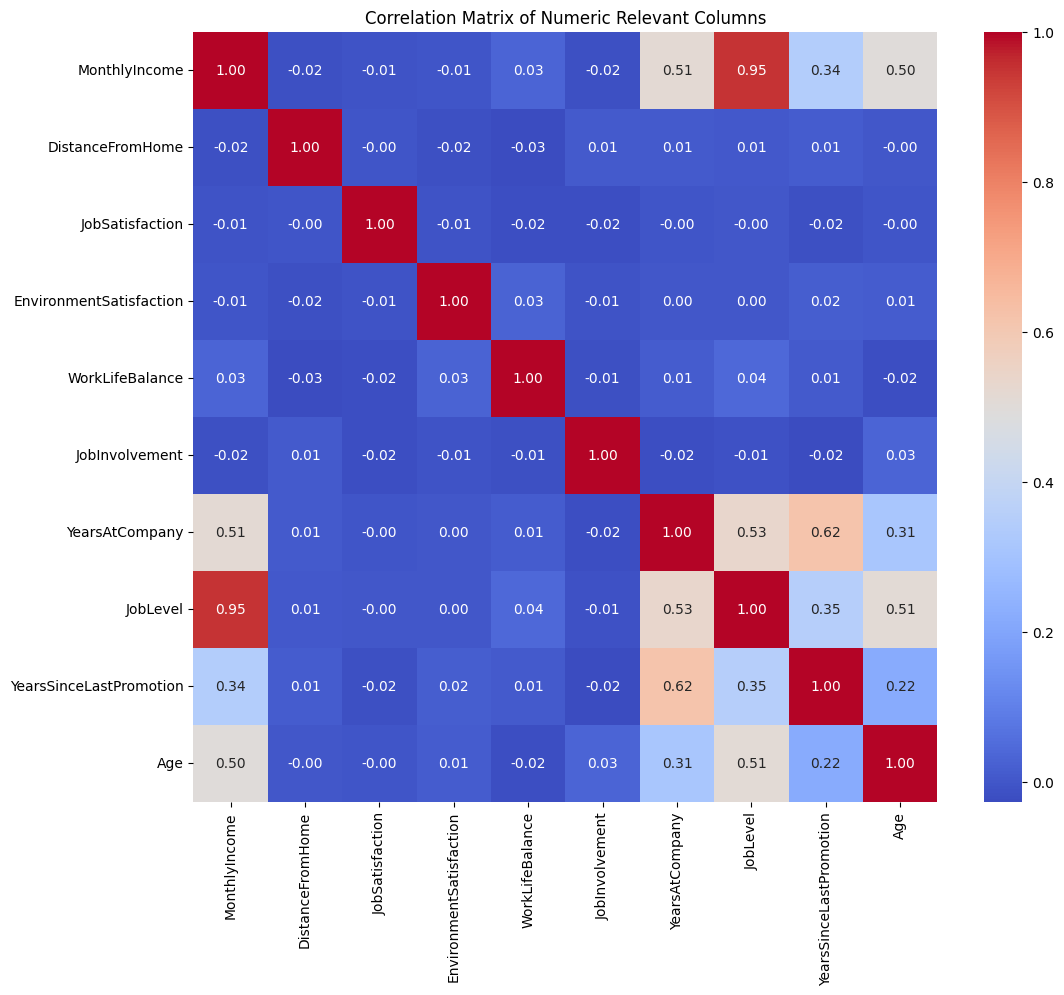

In [ ]:
numeric_cols = [col for col in relevant_columns.keys() if pd.api.types.is_numeric_dtype(df[col])]
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Relevant Columns')
plt.show()


### There is a lot of correlation between monthlyIncome, YearsAtCompany, JobLevel, YearsSincerLastPromotion and age. In the Tata Motors one there was good correlation in almost everything.

In [ ]:
for column in relevant_columns.keys():
    fig = px.histogram(df, x=column)
    fig.update_layout(bargap=0.2)
    fig.show()

In [ ]:
betray_df = df[list(relevant_columns.keys())].rename(columns=relevant_columns)

# Analysis
1. Most of the people will tend to have no attrition which is obvious.
2. Most of the soldiers would come under lower pay grade which can be seen in the hist.
3. Age seems like normally distributed.
4. The rest are just following the normal trend.

In [ ]:
scaler = MinMaxScaler()
betray_df[['Greed', 'Influence1']] = scaler.fit_transform(betray_df[['Greed', 'Influence1']])

In [ ]:
business_travel_map = {'Travel_Rarely': 0.5, 'Travel_Frequently': 1, 'Non-Travel': 0}
betray_df['Influence2'] = betray_df['Influence2'].map(business_travel_map)

In [ ]:
betray_df['Influence2'] = scaler.fit_transform(betray_df[['Influence2']])

In [ ]:
betray_df['Loyalty'] = betray_df['Loyalty'].map({'Yes': 0, 'No': 1})
betray_df['PersonalTies'] = betray_df['PersonalTies'].map({'Single': 0, 'Married': 1, 'Divorced': 0.5})

In [ ]:
betray_df['Age'] = scaler.fit_transform(betray_df[['Age']])
betray_df['Stress'] = betray_df['Stress'].map({'Yes': 1, 'No': 0})

In [ ]:
for column in ['Satisfaction1', 'Satisfaction2', 'Commitment1', 'Respect1', 'Satisfaction3']:
    betray_df[column] = np.exp(betray_df[column])
    betray_df[column] = scaler.fit_transform(betray_df[[column]])

In [ ]:
betray_df['Respect2'] = betray_df['Respect2'] / 5
betray_df['Respect2'] = np.exp(betray_df['Respect2'])
betray_df['Respect2'] = scaler.fit_transform(betray_df[['Respect2']])


In [ ]:
betray_df['Commitment2'] = betray_df['Commitment2'] / 2
betray_df['Commitment2'] = np.exp(betray_df['Commitment2'])
betray_df['Commitment2'] = scaler.fit_transform(betray_df[['Commitment2']])

In [ ]:
betray_df

,Loyalty,Greed,Influence1,Influence2,Satisfaction1,Satisfaction2,Satisfaction3,Commitment1,Commitment2,Respect1,Respect2,PersonalTies,Age,Stress
0,0,0.262454,0.000000,0.5,1.000000,0.090031,0.000000,0.334759,3.933822e-08,0.032059,0.000000,0.0,0.547619,1
1,1,0.217009,0.250000,1.0,0.090031,0.334759,0.334759,0.090031,3.038412e-07,0.032059,0.011601,1.0,0.738095,0
2,0,0.056925,0.035714,0.5,0.334759,1.000000,0.334759,0.090031,0.000000e+00,0.000000,0.000000,0.0,0.452381,1
3,1,0.100053,0.071429,1.0,0.334759,1.000000,0.334759,0.334759,1.104740e-07,0.000000,0.043075,1.0,0.357143,1
4,1,0.129489,0.035714,0.5,0.090031,0.000000,0.334759,0.334759,3.541643e-09,0.000000,0.025769,1.0,0.214286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0.082254,0.785714,1.0,1.000000,0.334759,0.334759,1.000000,2.304884e-08,0.032059,0.000000,1.0,0.428571,0
1466,1,0.472986,0.178571,0.5,0.000000,1.000000,0.334759,0.090031,6.619488e-08,0.119203,0.011601,1.0,0.500000,0
1467,1,0.270300,0.107143,0.5,0.090031,0.090031,0.334759,1.000000,3.933822e-08,0.032059,0.000000,1.0,0.214286,1
1468,1,0.230700,0.035714,1.0,0.090031,1.000000,0.090031,0.090031,1.834780e-07,0.032059,0.000000,1.0,0.738095,0


In [ ]:
betray_df

,Loyalty,Greed,Influence1,Influence2,Satisfaction1,Satisfaction2,Satisfaction3,Commitment1,Commitment2,Respect1,Respect2,PersonalTies,Age,Stress
0,0,0.262454,0.000000,0.5,1.000000,0.090031,0.000000,0.334759,3.933822e-08,0.032059,0.000000,0.0,0.547619,1
1,1,0.217009,0.250000,1.0,0.090031,0.334759,0.334759,0.090031,3.038412e-07,0.032059,0.011601,1.0,0.738095,0
2,0,0.056925,0.035714,0.5,0.334759,1.000000,0.334759,0.090031,0.000000e+00,0.000000,0.000000,0.0,0.452381,1
3,1,0.100053,0.071429,1.0,0.334759,1.000000,0.334759,0.334759,1.104740e-07,0.000000,0.043075,1.0,0.357143,1
4,1,0.129489,0.035714,0.5,0.090031,0.000000,0.334759,0.334759,3.541643e-09,0.000000,0.025769,1.0,0.214286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0.082254,0.785714,1.0,1.000000,0.334759,0.334759,1.000000,2.304884e-08,0.032059,0.000000,1.0,0.428571,0
1466,1,0.472986,0.178571,0.5,0.000000,1.000000,0.334759,0.090031,6.619488e-08,0.119203,0.011601,1.0,0.500000,0
1467,1,0.270300,0.107143,0.5,0.090031,0.090031,0.334759,1.000000,3.933822e-08,0.032059,0.000000,1.0,0.214286,1
1468,1,0.230700,0.035714,1.0,0.090031,1.000000,0.090031,0.090031,1.834780e-07,0.032059,0.000000,1.0,0.738095,0


In [ ]:
betray_df.nunique()

,0
Loyalty,2
Greed,1349
Influence1,29
Influence2,3
Satisfaction1,4
Satisfaction2,4
Satisfaction3,4
Commitment1,4
Commitment2,37
Respect1,5


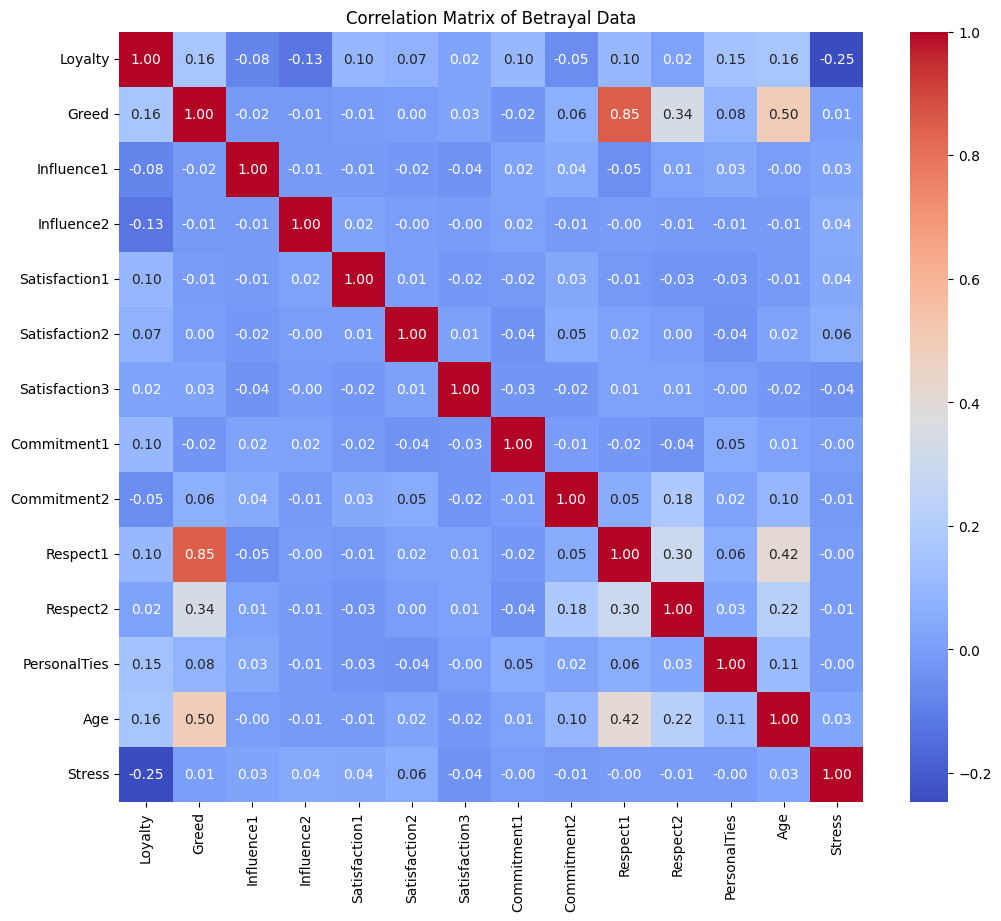

In [ ]:
correlation_matrix = betray_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Betrayal Data')
plt.show()

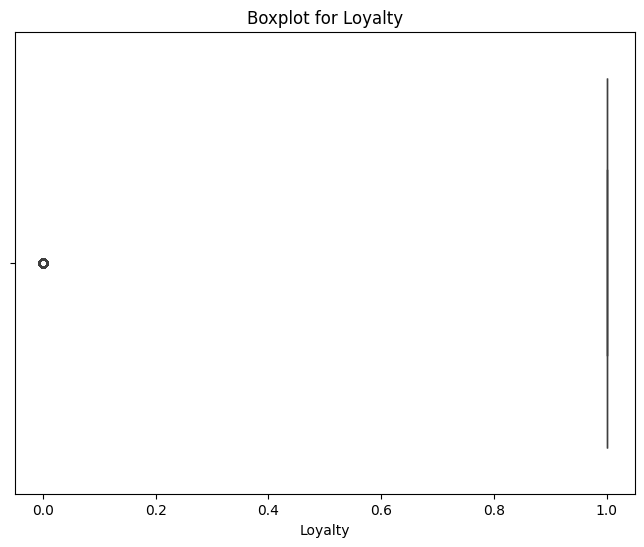

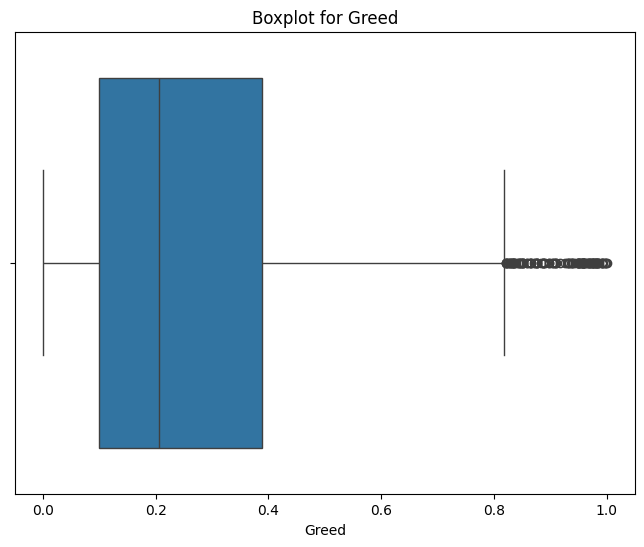

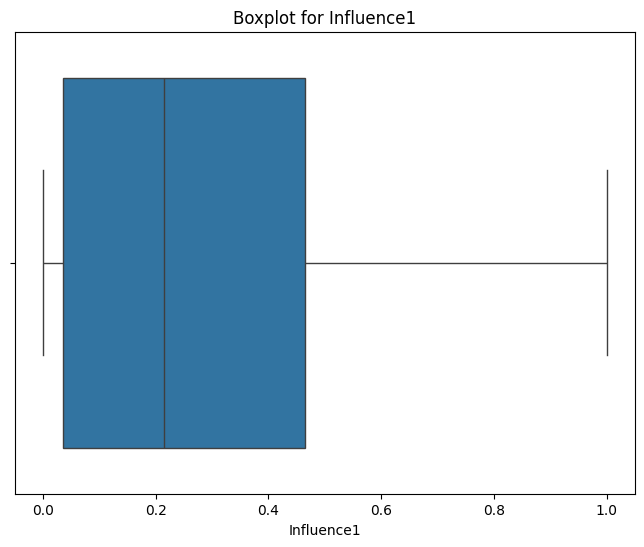

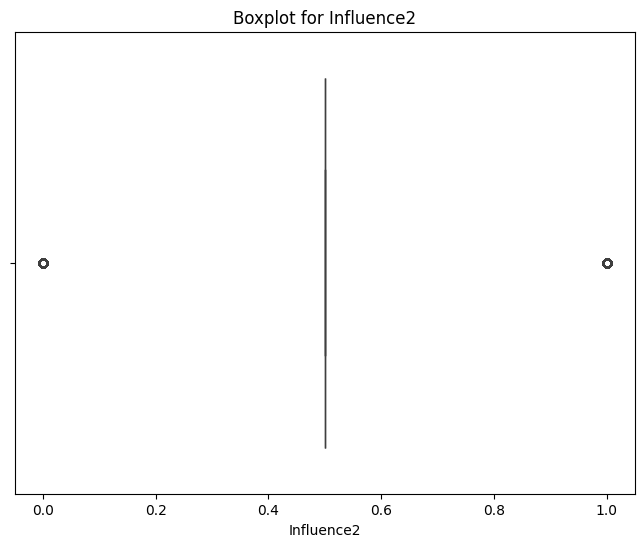

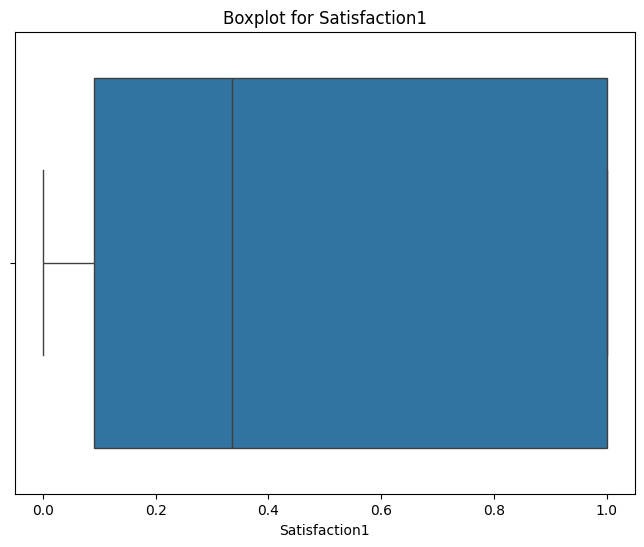

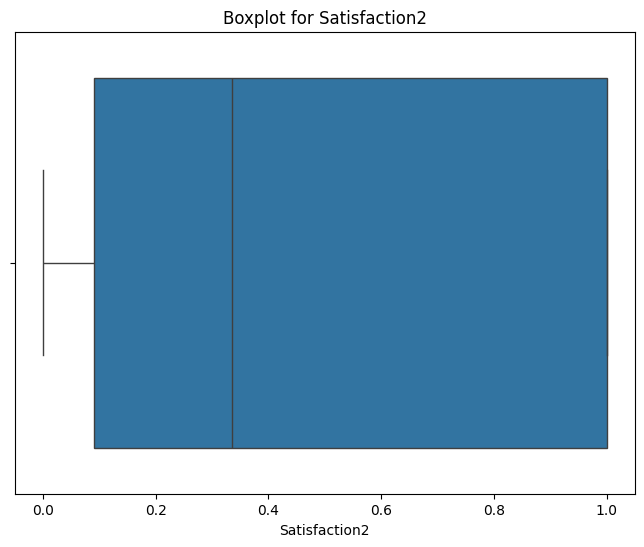

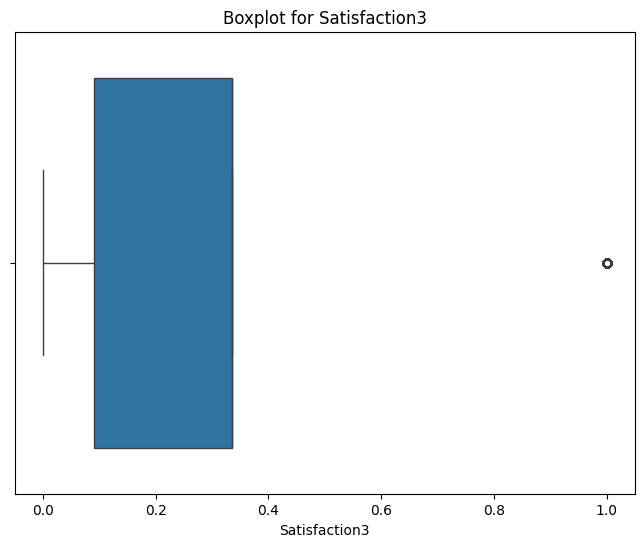

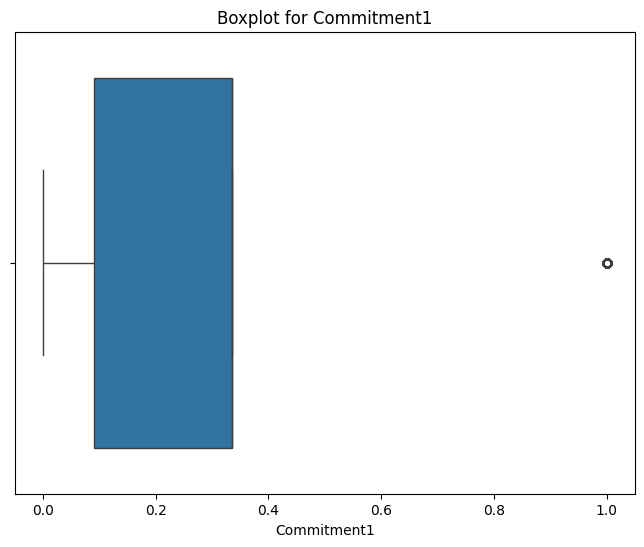

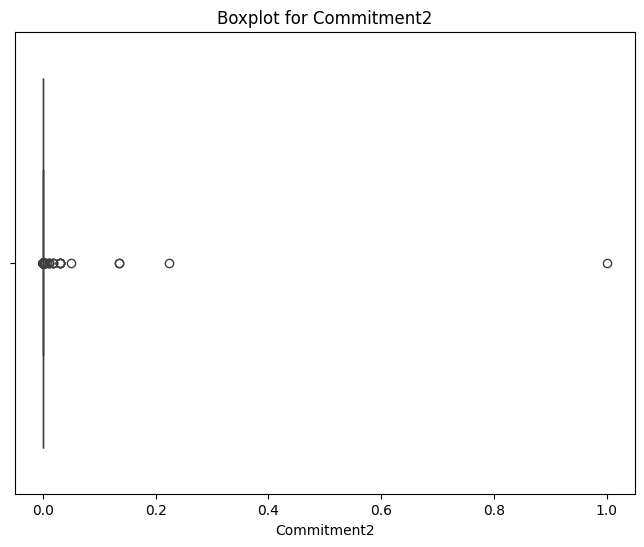

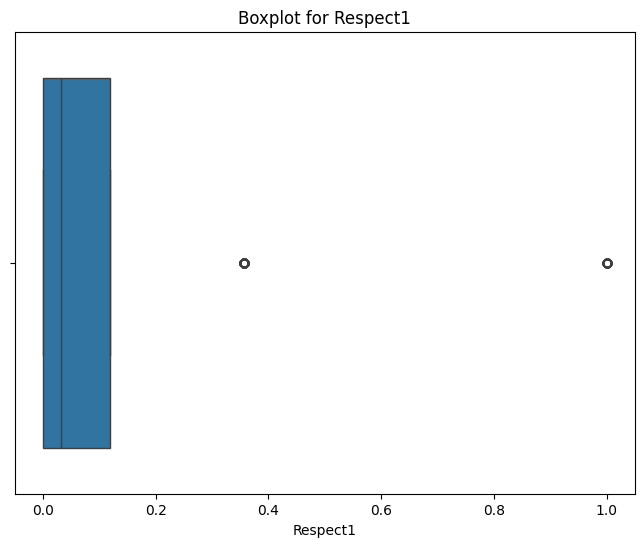

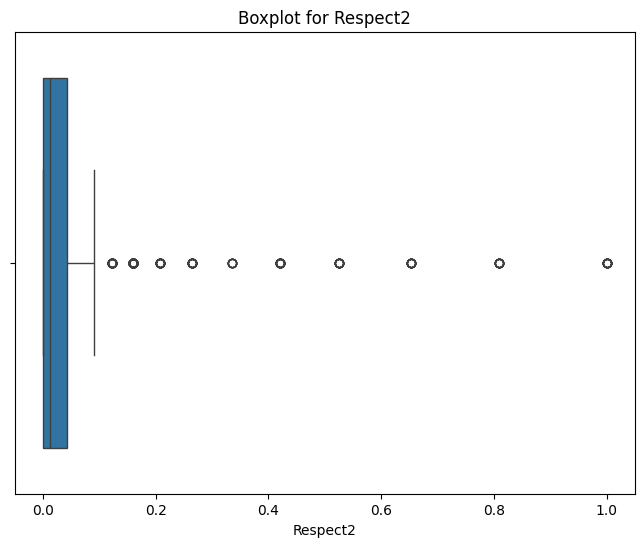

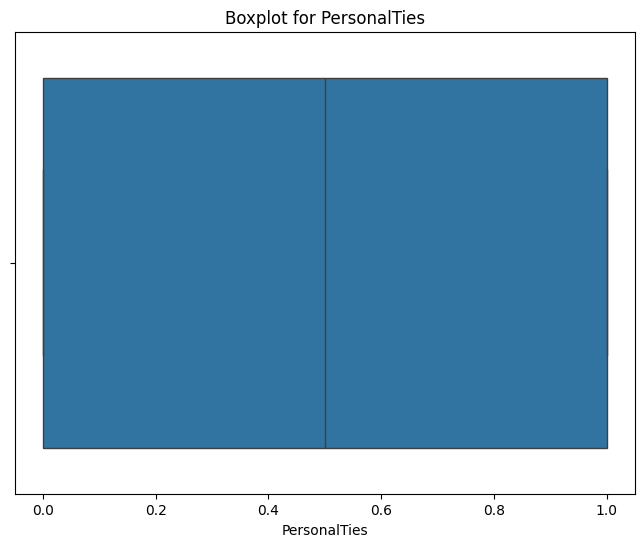

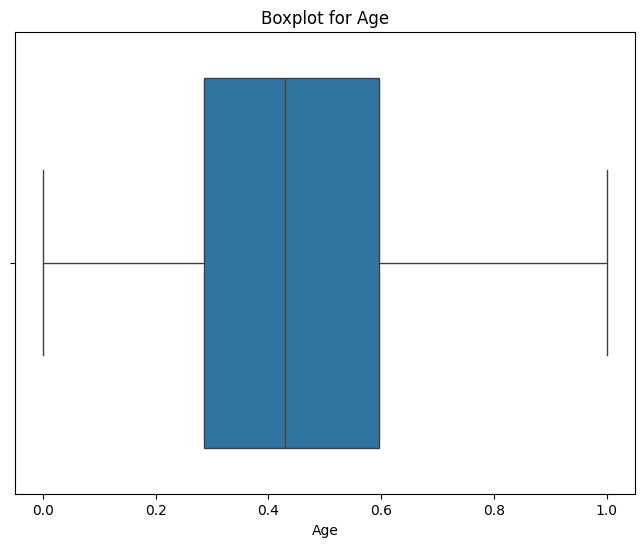

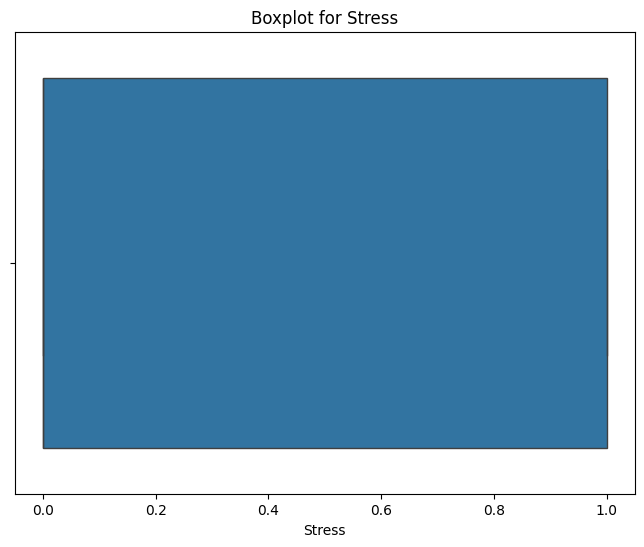

In [ ]:
for column in betray_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=betray_df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

Loyalty
1    0.838776
0    0.161224
Name: proportion, dtype: float64


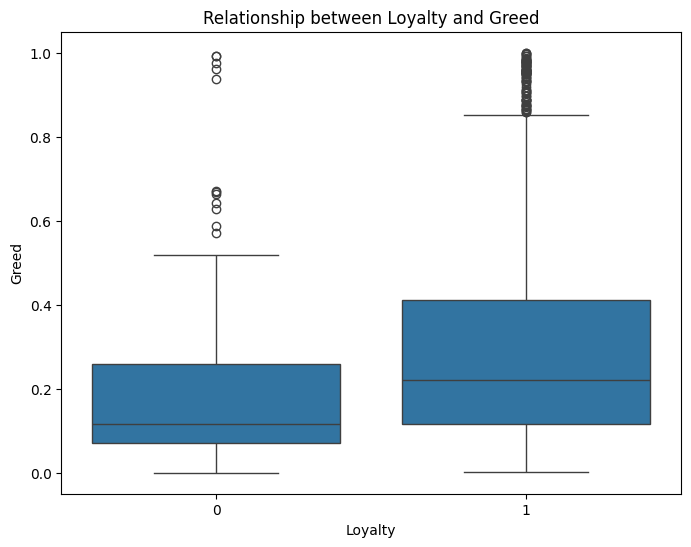

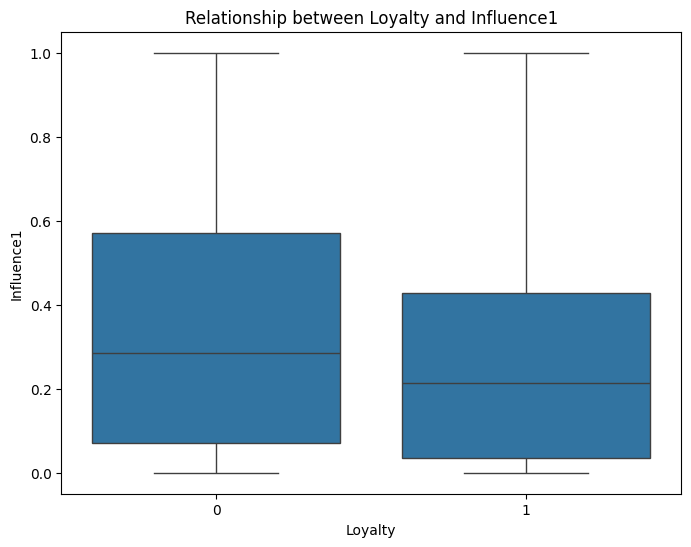

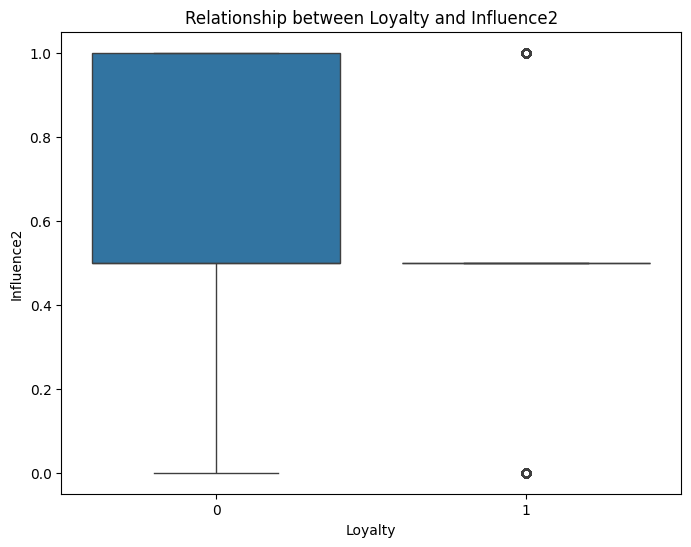

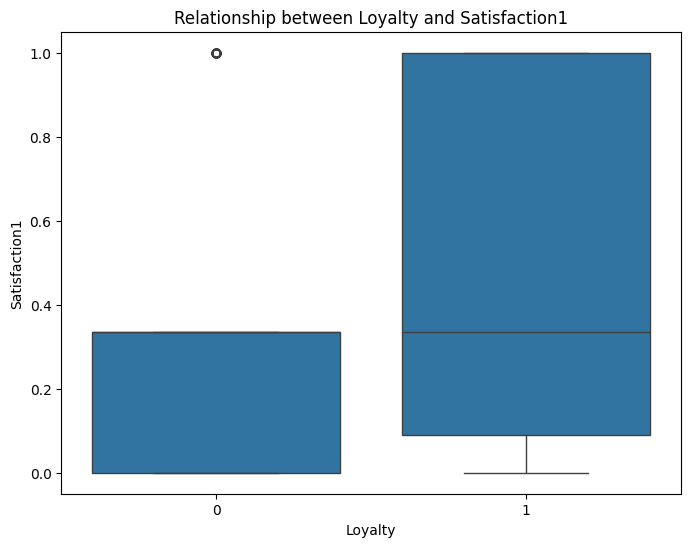

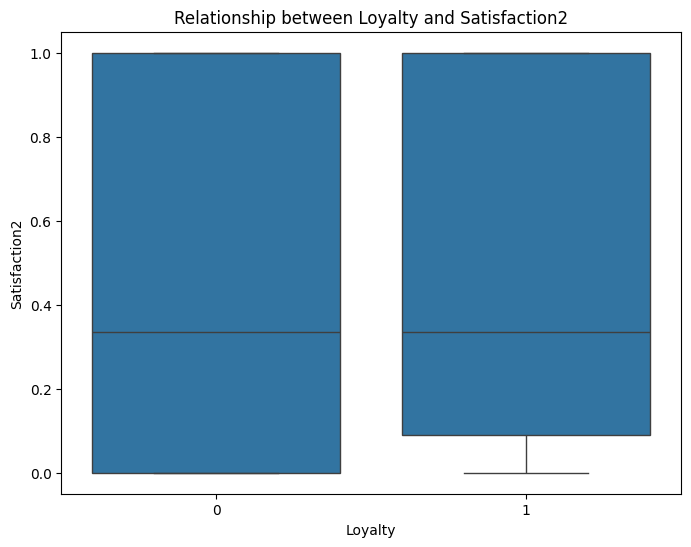

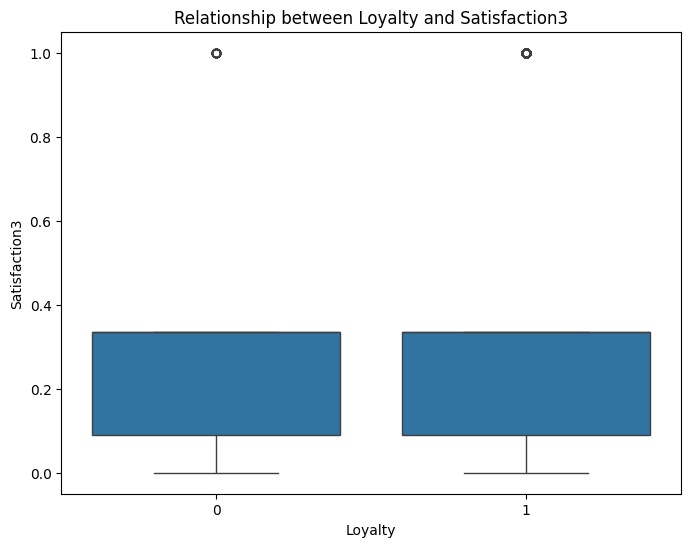

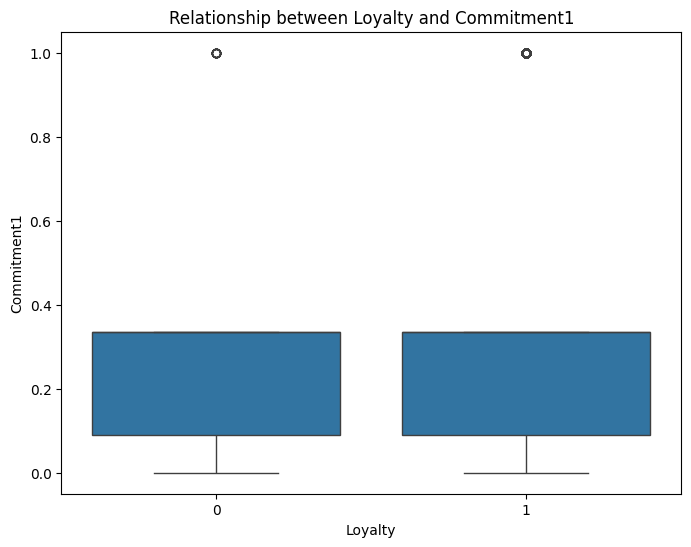

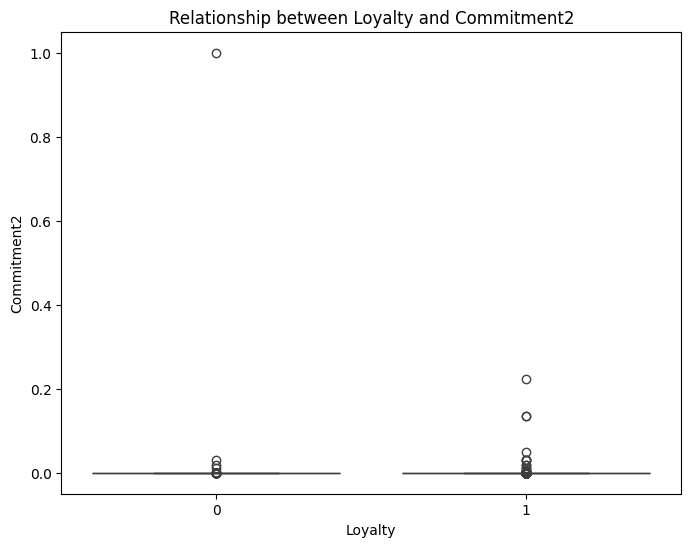

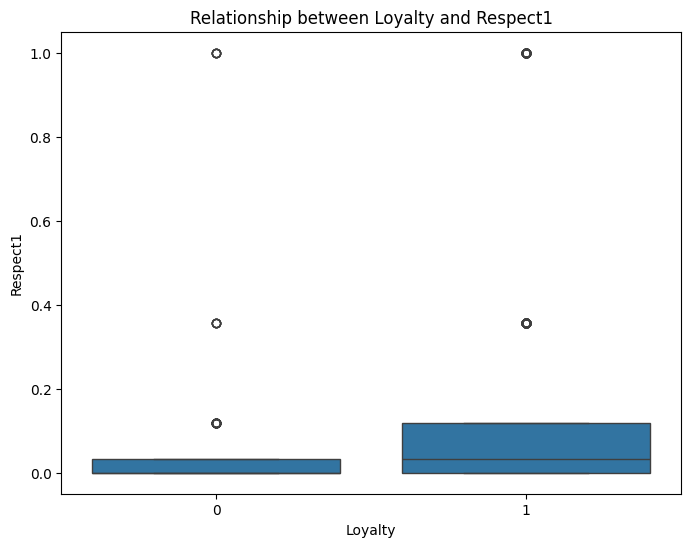

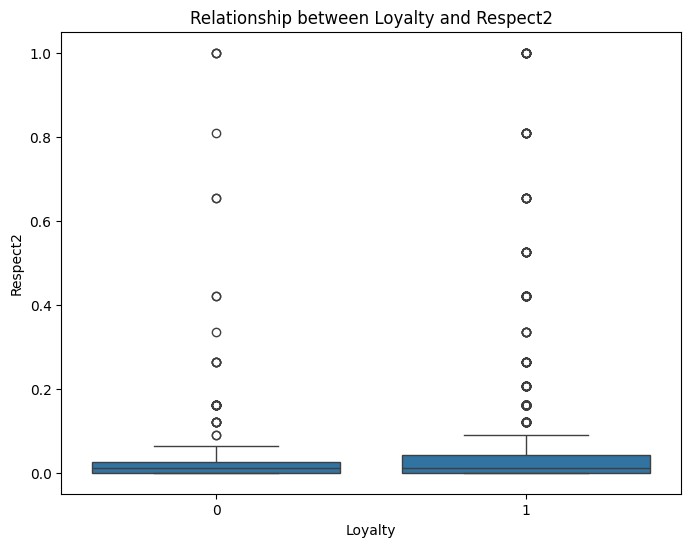

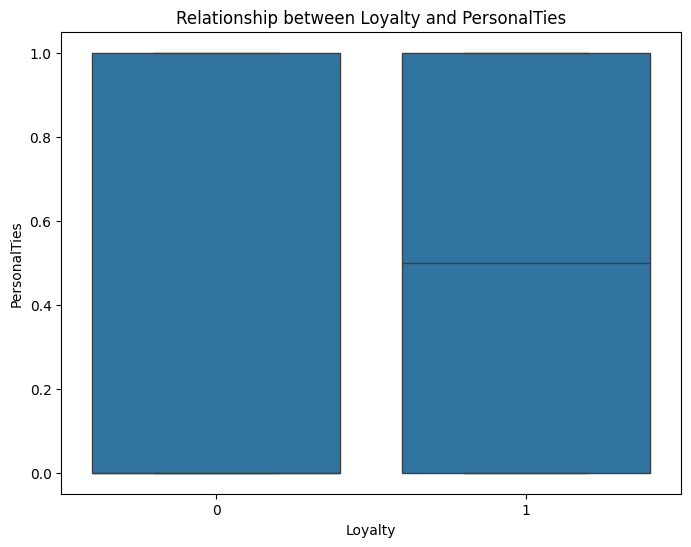

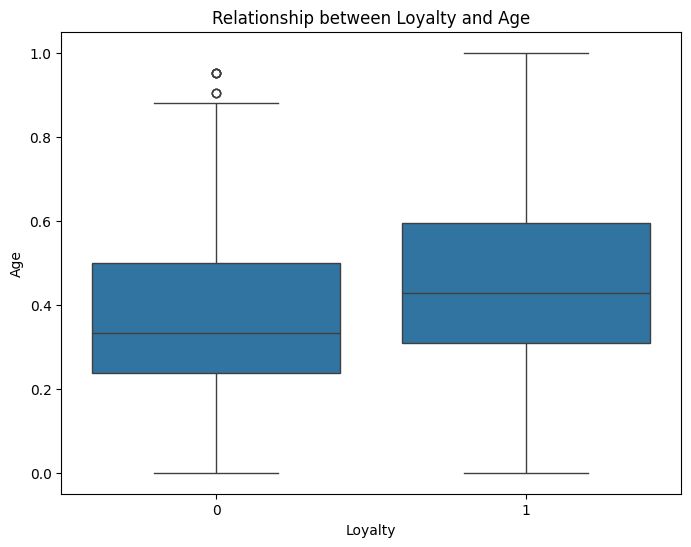

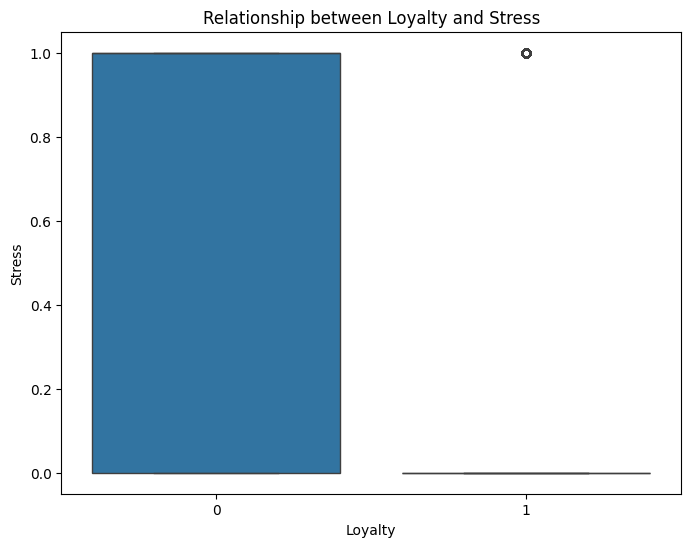

In [ ]:
print(betray_df['Loyalty'].value_counts(normalize=True))
# Analyze the relationship between attrition and other factors
for column in betray_df.columns:
    if column != 'Loyalty':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Loyalty', y=column, data=betray_df)
        plt.title(f'Relationship between Loyalty and {column}')
        plt.show()


In [ ]:
betray_df

,Loyalty,Greed,Influence1,Influence2,Satisfaction1,Satisfaction2,Satisfaction3,Commitment1,Commitment2,Respect1,Respect2,PersonalTies,Age,Stress
0,0,0.262454,0.000000,0.5,1.000000,0.090031,0.000000,0.334759,3.933822e-08,0.032059,0.000000,0.0,0.547619,1
1,1,0.217009,0.250000,1.0,0.090031,0.334759,0.334759,0.090031,3.038412e-07,0.032059,0.011601,1.0,0.738095,0
2,0,0.056925,0.035714,0.5,0.334759,1.000000,0.334759,0.090031,0.000000e+00,0.000000,0.000000,0.0,0.452381,1
3,1,0.100053,0.071429,1.0,0.334759,1.000000,0.334759,0.334759,1.104740e-07,0.000000,0.043075,1.0,0.357143,1
4,1,0.129489,0.035714,0.5,0.090031,0.000000,0.334759,0.334759,3.541643e-09,0.000000,0.025769,1.0,0.214286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0.082254,0.785714,1.0,1.000000,0.334759,0.334759,1.000000,2.304884e-08,0.032059,0.000000,1.0,0.428571,0
1466,1,0.472986,0.178571,0.5,0.000000,1.000000,0.334759,0.090031,6.619488e-08,0.119203,0.011601,1.0,0.500000,0
1467,1,0.270300,0.107143,0.5,0.090031,0.090031,0.334759,1.000000,3.933822e-08,0.032059,0.000000,1.0,0.214286,1
1468,1,0.230700,0.035714,1.0,0.090031,1.000000,0.090031,0.090031,1.834780e-07,0.032059,0.000000,1.0,0.738095,0


In [ ]:
betray_df['Greed'] = 1 - betray_df['Greed']

In [ ]:
betray_df['Respect2'] = 1 - betray_df['Respect2']

In [ ]:
satisfaction_weight1 = 0.3
satisfaction_weight2 = 0.3
satisfaction_weight3 = 0.4


betray_df['Satisfaction'] = (betray_df['Satisfaction1'] * satisfaction_weight1) + (betray_df['Satisfaction2'] * satisfaction_weight2)

respect_weight1 = 0.7
respect_weight2 = 0.3

betray_df['Respect'] = (betray_df['Respect1'] * respect_weight1) + (betray_df['Respect2'] * respect_weight2)

commitment_weight1 = 0.5
commitment_weight2 = 0.5

betray_df['Commitment'] = (betray_df['Commitment1'] * commitment_weight1) + (betray_df['Commitment2'] * commitment_weight2)

betray_df = betray_df.drop(['Satisfaction1', 'Satisfaction2', 'Respect1', 'Respect2', 'Commitment1', 'Commitment2'], axis=1)

betray_df


,Loyalty,Greed,Influence1,Influence2,Satisfaction3,PersonalTies,Age,Stress,Satisfaction,Respect,Commitment
0,0,0.737546,0.000000,0.5,0.000000,0.0,0.547619,1,0.327009,0.322441,0.167380
1,1,0.782991,0.250000,1.0,0.334759,1.0,0.738095,0,0.127437,0.318961,0.045015
2,0,0.943075,0.035714,0.5,0.334759,0.0,0.452381,1,0.400428,0.300000,0.045015
3,1,0.899947,0.071429,1.0,0.334759,1.0,0.357143,1,0.400428,0.287077,0.167380
4,1,0.870511,0.035714,0.5,0.334759,1.0,0.214286,0,0.027009,0.292269,0.167380
...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0.917746,0.785714,1.0,0.334759,1.0,0.428571,0,0.400428,0.322441,0.500000
1466,1,0.527014,0.178571,0.5,0.334759,1.0,0.500000,0,0.300000,0.379962,0.045015
1467,1,0.729700,0.107143,0.5,0.334759,1.0,0.214286,1,0.054018,0.322441,0.500000
1468,1,0.769300,0.035714,1.0,0.090031,1.0,0.738095,0,0.327009,0.322441,0.045015


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = betray_df.drop('Loyalty', axis=1)
y = betray_df['Loyalty']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8707482993197279


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)

print(f"Test Accuracy: {test_acc:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7309 - loss: 0.5919 - val_accuracy: 0.7966 - val_loss: 0.4703
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8388 - loss: 0.4137 - val_accuracy: 0.7966 - val_loss: 0.4473
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8447 - loss: 0.3981 - val_accuracy: 0.8051 - val_loss: 0.4353
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8571 - loss: 0.3636 - val_accuracy: 0.8136 - val_loss: 0.4296
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8722 - loss: 0.3366 - val_accuracy: 0.8178 - val_loss: 0.4250
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8523 - loss: 0.3586 - val_accuracy: 0.8220 - val_loss: 0.4272
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8841 - loss: 0.3093 - val_accuracy: 0.8390 - val_loss: 0.4228
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8777 - loss: 0.3360 - val_accuracy: 0.8305 - val_los

In [ ]:
lstm_model = models.Sequential()
lstm_model.add(layers.LSTM(64, input_shape=(X_train_scaled.shape[1], 1), return_sequences=True))
lstm_model.add(layers.LSTM(32))
lstm_model.add(layers.Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=30, batch_size=32, validation_split=0.2)

lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test_lstm, y_test)

print(f"LSTM Test Accuracy: {lstm_test_acc:.4f}")


Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.7982 - loss: 0.6396 - val_accuracy: 0.7966 - val_loss: 0.5290
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8426 - loss: 0.4337 - val_accuracy: 0.7966 - val_loss: 0.4930
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8265 - loss: 0.4556 - val_accuracy: 0.7966 - val_loss: 0.4953
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8402 - loss: 0.4283 - val_accuracy: 0.7966 - val_loss: 0.4920
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8558 - loss: 0.3995 - val_accuracy: 0.7966 - val_loss: 0.4819
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8496 - loss: 0.4099 - val_accuracy: 0.7966 - val_loss: 0.4877
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8231 - loss: 0.4506 - val_accuracy: 0.7966 - val_loss: 0.5118
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8401 - loss: 0.4334 - val_accuracy: 0.7966 - v

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

betray_df=pd.read_csv('betray_df.csv')

# Use Loyalty as the target variable (attrition: 0 = attrition, 1 = loyalty)
X = betray_df.drop(['Unnamed: 0', 'Loyalty'], axis=1).values
y = betray_df['Loyalty'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Transformer model definition
class AttritionTransformer(nn.Module):
    def __init__(self, input_dim, d_model=128, nhead=4, num_layers=2, num_classes=2):
        super(AttritionTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer for input features
        self.transformer = nn.Transformer(
            d_model=d_model, nhead=nhead, num_encoder_layers=num_layers, num_decoder_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Final classification layer

    def forward(self, x):
        # Add an extra dimension for sequence length (needed for transformer)
        x = x.unsqueeze(1)  # (batch_size, seq_length=1, input_dim)
        x = self.embedding(x)  # Project input to transformer input size (d_model)
        x = self.transformer(x, x)  # Transformer layer (encoder + decoder)
        x = x.mean(dim=1)  # Global average pooling over the sequence dimension
        x = self.fc(x)  # Classification layer
        return x

# Model hyperparameters
input_dim = X_train.shape[1]
model = AttritionTransformer(input_dim)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train(model, X_train, y_train, epochs=20):
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Train the model
train(model, X_train_tensor, y_train_tensor)

# Evaluation
def evaluate(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        output = model(X_test)
        _, predicted = torch.max(output, 1)
        accuracy = (predicted == y_test).float().mean()
        print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on test data
evaluate(model, X_test_tensor, y_test_tensor)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)



Epoch [1/20], Loss: 0.5066
Epoch [2/20], Loss: 1.1140
Epoch [3/20], Loss: 0.6208
Epoch [4/20], Loss: 0.7123
Epoch [5/20], Loss: 0.4291
Epoch [6/20], Loss: 0.4646
Epoch [7/20], Loss: 0.4983
Epoch [8/20], Loss: 0.4888
Epoch [9/20], Loss: 0.4607
Epoch [10/20], Loss: 0.4380
Epoch [11/20], Loss: 0.4358
Epoch [12/20], Loss: 0.4459
Epoch [13/20], Loss: 0.4543
Epoch [14/20], Loss: 0.4511
Epoch [15/20], Loss: 0.4359
Epoch [16/20], Loss: 0.4293
Epoch [17/20], Loss: 0.4209
Epoch [18/20], Loss: 0.4241
Epoch [19/20], Loss: 0.4225
Epoch [20/20], Loss: 0.4220
Test Accuracy: 0.8673
